# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
    - **Task 2: Classification** Classify for review score
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


# <span style='color:blue'>Data Preparation (15 points total)</span>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when convertin to/ from CSV file format</span>
*[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [1]:
# set up environment and load dataset

import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import copy

# set working directory
os.chdir(r"C:\Users\justi\GitHub\olist\data")
print('Current working directory:',os.getcwd())

# Let's get the data
olist_download = pd.read_csv('olist_lab1_data.csv')  
print(olist_download.shape)
olist_download.head()

Current working directory: C:\Users\justi\GitHub\olist\data
(114067, 47)


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [2]:
olist = copy.deepcopy(olist_download) # so now we have a back up of the original dataset

## <span style='color:red'>Define class variable representations (int,float, onehot, etc)</span>

In [3]:
olist.info() #initial variable Dtypes - we will need to fix these!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [4]:
# clean up attributes in the relaoded dataset from lab 1

#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['customer_city','customer_state','customer_zip_code_prefix','seller_zip_code_prefix',
                'seller_city','seller_state','product_category_english','review_id','review_comment_title',
                'review_comment_message','payment_type','order_item_id', 'product_id','seller_id','order_id', 
                'customer_id','customer_unique_id','delivery_est_discrepancy_range','purchase_month','purchase_wk_day',
                'review_score_class'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [5]:
# use the "astype" function to change the variable type

olist[cat_features] = olist.copy()[cat_features].astype('category')

olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)


In [6]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")

In [7]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

In [8]:
# 4 possible outcomes for payment type
olist.payment_type.value_counts()

credit_card    84163
boleto         22203
voucher         6068
debit_card      1633
Name: payment_type, dtype: int64

In [9]:
# remove the response variable - payment_method
olist_y = copy.deepcopy(olist.payment_type)
olist_X = copy.deepcopy(olist.drop(columns=['payment_type']))
print(olist_y.value_counts())
print('\n=====================\nolist_X\n=====================\n')
olist_X.info()

credit_card    84163
boleto         22203
voucher         6068
debit_card      1633
Name: payment_type, dtype: int64

olist_X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           11

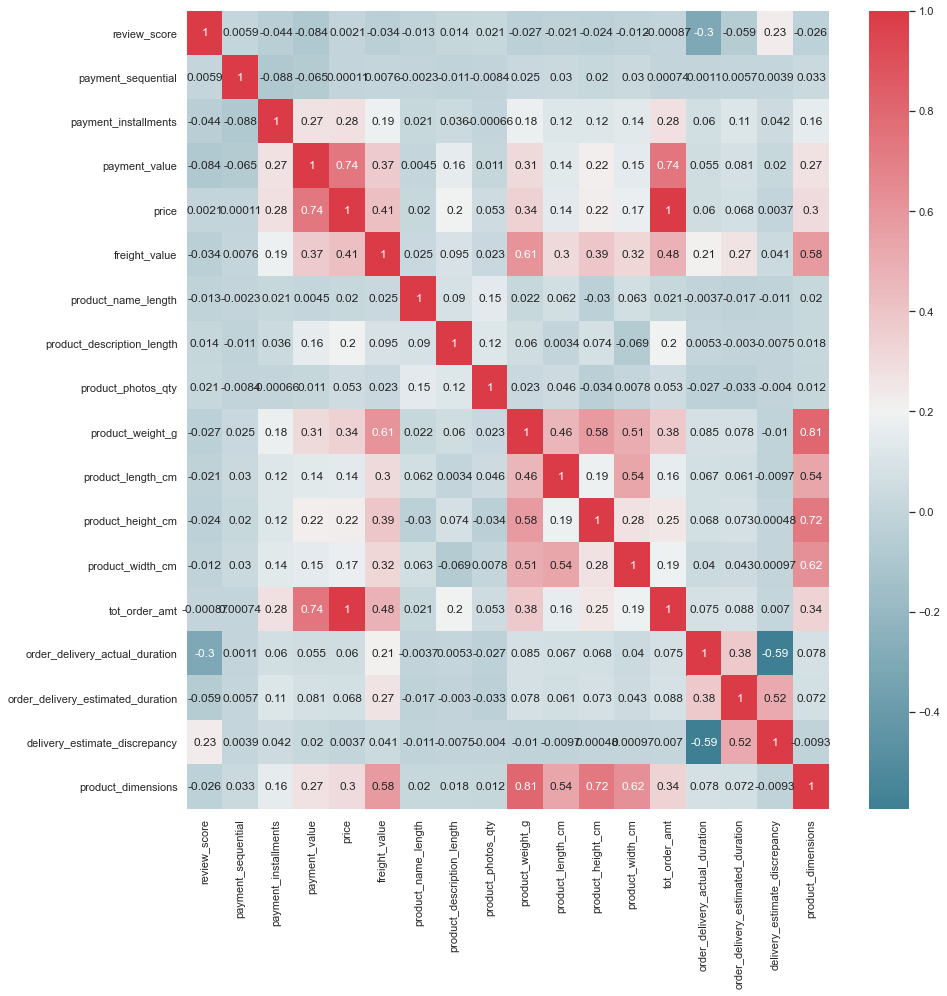

In [10]:
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [11]:
# before we get started, we need to remove fields with NaN - as in the comment title and message fields
X = copy.deepcopy(olist_X)
y = copy.deepcopy(olist_y)
X = X.drop('review_comment_title', axis=1)
X = X.drop('review_comment_message', axis=1)
X = X.drop('review_id', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

In [12]:
bad_seed = X[X.product_weight_g.isna()].index.values.tolist()[0]
print('Row Index:',bad_seed, 'has NaN\'s')
X = X.drop(index = [bad_seed], axis = 0)
y = y.drop(index = [bad_seed], axis = 0)

X.isna().any()


Row Index: 40711 has NaN's


order_id                             False
customer_id                          False
order_purchase_timestamp             False
order_approved_at                    False
order_delivered_carrier_date         False
order_delivered_customer_date        False
order_estimated_delivery_date        False
customer_unique_id                   False
customer_zip_code_prefix             False
customer_city                        False
customer_state                       False
review_score                         False
review_creation_date                 False
review_answer_timestamp              False
payment_sequential                   False
payment_installments                 False
payment_value                        False
order_item_id                        False
product_id                           False
seller_id                            False
shipping_limit_date                  False
price                                False
freight_value                        False
product_nam

In [13]:
print(X.shape, y.shape)

(114066, 43) (114066,)


##### StratifiedShuffleSplit Train/Test
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit#sklearn.model_selection.StratifiedShuffleSplit

In [14]:
# train/ test split
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!

print(cv)
print(cv.get_n_splits(X,y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(X,y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    print("TRAIN:", trainidx, "| TEST:", testidx)
    X_train, X_test = X.iloc[trainidx], X.iloc[testidx] 
    y_train, y_test = y.iloc[trainidx], y.iloc[testidx]


StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7)
10
TRAIN: [ 2329 78753 73450 ... 45368 56442 12235] | TEST: [66993 81887 37195 ... 97428 82984 40350]
TRAIN: [ 41119 106800  49730 ...  10579  71725  50757] | TEST: [   188  17668  52092 ...  62678  88652 101238]
TRAIN: [ 83878  88765  96110 ... 108894  13810  27637] | TEST: [18600 20622 53228 ... 27727 17351 43131]
TRAIN: [ 87233  56427 103970 ... 106825  39657  79024] | TEST: [110103  45894  78407 ...  63206  78033  69132]
TRAIN: [58413 58570 32651 ... 13535 45181 68462] | TEST: [22204 73225 99709 ... 92745 75178 82488]
TRAIN: [ 78166  52676  83844 ...  77119 108724  22556] | TEST: [ 63917  26726 106031 ... 103237  99094  60872]
TRAIN: [ 34618  31997   2365 ...  28653  37215 103176] | TEST: [92243 16836  5362 ... 19384 66606 10131]
TRAIN: [16981 56956 15128 ... 36849 67457  4438] | TEST: [110353 112542  20439 ...  97625  67611  93528]
TRAIN: [  2912  51947  36805 ...  71876 109188 102801] 

In [15]:
print('Let\'s take a look at how our training/ test splits came out:')
print(cv,'\nn_splits:',cv.get_n_splits(X,y))
print('X_train.shape:',X_train.shape, 'X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape, 'y_test.shape:',y_test.shape)


Let's take a look at how our training/ test splits came out:
StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7) 
n_splits: 10
X_train.shape: (79846, 43) X_test.shape: (34220, 43)
y_train.shape: (79846,) y_test.shape: (34220,)


In [16]:
X_train.describe(include=['category'], exclude='datetime')

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class,delivery_est_discrepancy_range
count,79846,79846,79846,79846,79846,79846,79846.0,79846,79846,79846,79846.0,79846,79846,79846,79846,79846,79846
unique,69396,69396,67589,13776,3687,27,19.0,26144,2750,73,2032.0,568,22,7,12,3,5
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,22790,sao paulo,SP,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,sao paulo,SP,Monday,May,good,too early
freq,40,40,44,105,12623,33646,69826.0,361,1497,8306,5772.0,19936,57053,13066,8618,60962,56663


In [17]:
X_test.describe(include=['category'], exclude='datetime')

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class,delivery_est_discrepancy_range
count,34220,34220,34220,34220,34220,34220,34220.0,34220,34220,34220,34220.0,34220,34220,34220,34220,34220,34220
unique,31832,31832,31425,10739,2784,27,20.0,15419,2291,73,1763.0,507,22,7,12,3,5
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,24220,sao paulo,SP,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,bed_bath_table,14940.0,sao paulo,SP,Tuesday,August,good,too early
freq,23,23,31,50,5378,14475,30035.0,168,629,3502,2416.0,8495,24316,5629,3745,26167,24375


##### <span style='color:red'><b>SelectKBest Feature Selection</b></span>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#

In [50]:
# use SelectKBest from Sklearn to get an idea of best features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
   
# convert categorical variables into numeric values
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=130000) 
# use 130,000 for unknown because it is big enough to not be confused with other categories
enc.fit(X_train) # 
X_train_num = enc.transform(X_train)
X_test_num = enc.transform(X_test)

    
# convert the resonse variables into numeric values
le = LabelEncoder()
le.fit(y_train)
y_train_num = le.transform(y_train)
y_test_num = le.transform(y_test)
    
# build the feature selection function using SelectKBest
# Note here: i ran this and determined that I wanted k=16 total
skb = SelectKBest(chi2, k=16)  #since we have 44 features, let's see if we can just break then in half
skb.fit(X_train_num,y_train_num)
X_train_feats = skb.transform(X_train_num)
X_test_feats = skb.transform(X_test_num)


# create a dataframe matching feature names to chi^2 scores
cols = np.array(X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_})

# sort by score values in descending order
feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(feat_scores)

                              feature       score
0                       payment_value 14043494.30
1            order_purchase_timestamp  5463530.55
2       order_delivered_customer_date  5291779.79
3             review_answer_timestamp  5198404.89
4                 shipping_limit_date  4985094.28
5                   order_approved_at  4815721.94
6        order_delivered_carrier_date  4270592.82
7                       tot_order_amt  1965437.11
8                               price   362753.24
9            customer_zip_code_prefix   308669.46
10                        customer_id   260082.38
11                 customer_unique_id   163451.11
12                 payment_sequential   116180.82
13                           order_id   106748.99
14                 product_dimensions    44169.02
15               payment_installments    36593.64
16                   product_weight_g    27652.88
17                         product_id    27372.29
18         product_description_length    24623.87


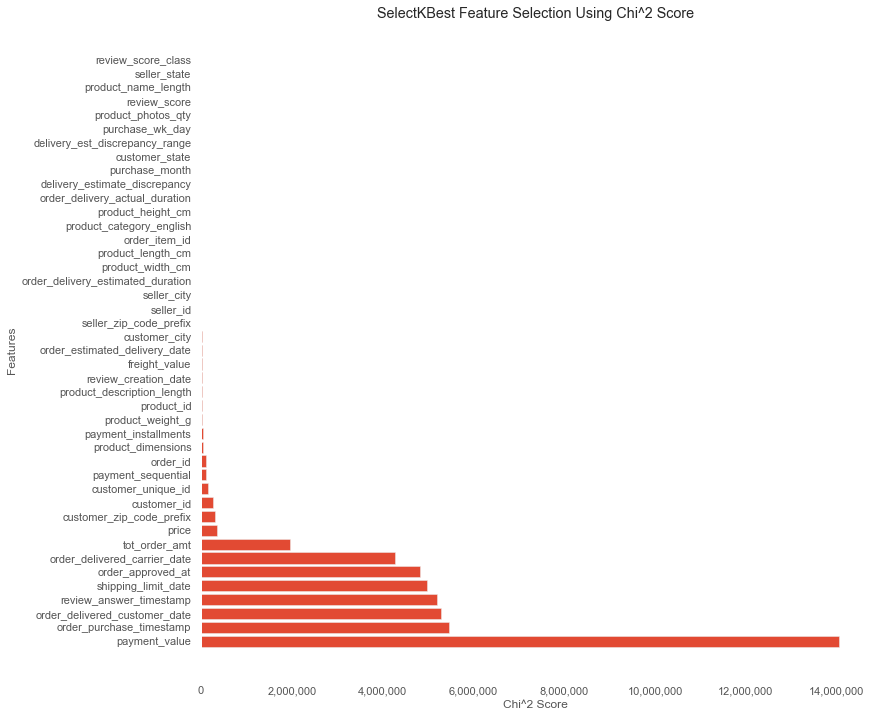

In [51]:
# plot the scores
from matplotlib import pyplot

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))

ft = feat_scores.feature
width = feat_scores.score

ax.barh(ft, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(ft)
ax.set_yticklabels(ft)

plt.title('SelectKBest Feature Selection Using Chi^2 Score')
plt.ylabel('Features')
plt.xlabel('Chi^2 Score')
plt.show()

#Note I want to keep the top 15, so we will rerun this using k=15 to get our X_train_feats/ X_test_feats with 15 features

In [102]:
X_train[selection.feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79846 entries, 91740 to 36795
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   payment_value                  79846 non-null  float64       
 1   order_purchase_timestamp       79846 non-null  datetime64[ns]
 2   order_delivered_customer_date  79846 non-null  datetime64[ns]
 3   review_answer_timestamp        79846 non-null  datetime64[ns]
 4   shipping_limit_date            79846 non-null  datetime64[ns]
 5   order_approved_at              79846 non-null  datetime64[ns]
 6   order_delivered_carrier_date   79846 non-null  datetime64[ns]
 7   tot_order_amt                  79846 non-null  float64       
 8   price                          79846 non-null  float64       
 9   customer_zip_code_prefix       79846 non-null  category      
 10  customer_id                    79846 non-null  category      
 11  customer_un

NoneType

In [94]:
selection = pd.DataFrame({'feature':list(feat_scores.feature[0:16])})
selection['description'] = ['transaction value',
                            'purchase initiation timestamp',
                            'actual order delivery date to the customer',
                            'satisfaction survey answer timestamp',
                            'seller shipping limit date for handing the order off to the logistic partner',
                            'payment approval timestampe',
                            'order posting timestamp when it was handed to the logistic partner',
                            'price customer paid for item + freight cost',
                            'item price',
                            'first five digits of customer zip code',
                            'key to the orders dataset - each order has a unique customer_id',
                            'unique identifier of a customer',
                            'number of payment methods used by the customer',
                            'order unique identifier',
                            'product length x width x height all in cm',
                            'number of payment installments by customer']
selection

,feature,description
0,payment_value,transaction value
1,order_purchase_timestamp,purchase initiation timestamp
2,order_delivered_customer_date,actual order delivery date to the customer
3,review_answer_timestamp,satisfaction survey answer timestamp
4,shipping_limit_date,seller shipping limit date for handing the ord...
5,order_approved_at,payment approval timestampe
6,order_delivered_carrier_date,order posting timestamp when it was handed to ...
7,tot_order_amt,price customer paid for item + freight cost
8,price,item price
9,customer_zip_code_prefix,first five digits of customer zip code


# <span style='color:blue'>Data Preparation  - Summary (15 points total)</span>
## <u>Categorizing How a Customer Will Pay For an Order from Olist</u>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). 
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when convertin to/ from CSV file format</span>
    - <span style='color:blue'>Defined class variables based on the classes used and determined in Lab 1.</span>
    - <span style='color:blue'>StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,train_size=0.7) was used to split the training and test data using k=10 fold for cross validation in the training set, this was done prior to utilizing any feature reduction in order to prevent data leakage</span>
    - <span style='color:blue'>Since we don't plan to use logistic regression for determining how someone is going to pay, we did not one-hot encode any variables for this section.</span>
    - <span style='color:blue'>We did use scikit learn's OrdinalEncoder and LabelEncoder in order to utilize scikit learn's SelectKBest function for feature reduction</span>   
  
* Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
    - <span style='color:blue'>We utilized scikit learn's SelectKBest for feature selection and determined the best k was about 16 features, we could've gone more or lesss, in fact there was a big dropoff in the chi^2 score between the 14th and 15th feature, but the 16th feaure is called payment_installments and that just intuitively feels like something that affects what payment method a customer is going to use</span>
    
* [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).<br>
    - <span style='color:blue'>dtypes: category(4), datetime64[ns](6), float64(6)</span><br>
    - <span style='color:blue'>no new variables were created for this categorization exercise</span>



# Modeling and Evaluation (70 points total)
* [10 points] 
    - Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). 
    - Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* [10 points] 
    - Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). 
    - Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* [20 points] Create <span style="color:blue"> **three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two).**</span> Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### Model Selection
- KNN
- Naive Bayes
- Random Forest

# Deployment (5 points total)
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
* One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?